#  분류: 크로스 엔트로피 cross entropy

### -(y * log(h) + (1-y) * log(1-h)) ,   h = sigmoid(WX+b)

### 예측: 기존 MSE(Mean Square Error) 
###  (square(h-y))

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pltset_datetimeparse_function

In [2]:
np.set_printoptions(precision=4)
y = np.array([0,0,0,1,1,1]) # 클래스 번호
h = np.array([0.01, 0.1, 0.3,  0.99, 0.8, 0.7]) # 모델의 예측

In [3]:
(h - y)**2

array([0.0001, 0.01  , 0.09  , 0.0001, 0.04  , 0.09  ])

log(1) = 0,  np.log(0) = -inf

In [4]:
-(y * np.log(h)) #왼쪽, y가 1인 샘플의 코스트

array([0.    , 0.    , 0.    , 0.0101, 0.2231, 0.3567])

In [5]:
-((1-y) * np.log(1-h)) #오른쪽, y가 0인 샘플의 코스트

array([0.0101, 0.1054, 0.3567, 0.    , 0.    , 0.    ])

In [6]:
-(y * np.log(h) + (1-y) * np.log(1-h))

array([0.0101, 0.1054, 0.3567, 0.0101, 0.2231, 0.3567])

In [7]:
#에러 크기 비교, MES < CE  
np.mean((h - y)**2), np.mean(-(y * np.log(h) + (1-y) * np.log(1-h)))

(0.03836666666666667, 0.1769924377594173)

In [8]:
xx = np.arange(0,1.1,0.001)
yy = np.log(xx)
plt.scatter(xx,yy, s=2)
plt.scatter(1, np.log(1), s=100)
plt.title('log')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


NameError: name 'plt' is not defined

In [ ]:
np.round(h)

In [9]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2.0]] #실수
y_data = [[0],[0],[0],[1],[1],[1.0]] #실수
len(x_data), len(y_data)

(6, 6)

In [48]:
x = tf.constant(x_data, dtype=tf.float32)
y = tf.constant(y_data, dtype=tf.float32)
seed = 100
W = tf.Variable(tf.random_normal(shape=[2,1],seed=seed))
b = tf.Variable(tf.random_normal(shape=[1],seed=seed))
h = tf.sigmoid(tf.matmul(x, W)) + b  #(6,2) * (2,1) = (6,1)
h = tf.maximum(1e-8, h) #하한
h = tf.minimum(1 - 1e-8, h) #상한
cost = -tf.reduce_mean((y * tf.log(h) + (1-y) * tf.log(1-h)))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
predicted = tf.cast(h > 0.5, tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(y, predicted), tf.float32))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        _, c, acc = sess.run([train, cost, accuracy])
        if i%1000==0:print(i, c, acc)
    print(sess.run(h))

0 0.67949146 0.5
1000 0.42254338 0.8333333
2000 0.39378938 0.8333333
3000 0.38782367 0.8333333
4000 0.38418242 0.8333333
5000 0.3823067 0.8333333
6000 0.38111243 0.8333333
7000 0.380358 0.8333333
8000 0.37971327 0.8333333
9000 0.37923262 0.8333333
[[1.0000e-08]
 [1.0000e-08]
 [7.3722e-01]
 [7.0709e-01]
 [7.4212e-01]
 [7.4693e-01]]


In [55]:
import pandas as pd
#github 에서 raw 버튼 눌러서 나오는 주소입니다 
url='https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/data-03-diabetes.csv'
df = pd.read_csv(url, header=None)
data = np.array(df)
data.shape

In [58]:
x_data = data[:,:-1]
y_data = data[:,[-1]]

In [ ]:
x = tf.constant(x_data, dtype=tf.float32)
y = tf.constant(y_data, dtype=tf.float32)
seed = 100
W = tf.Variable(tf.random_normal(shape=[8,1],seed=seed))
b = tf.Variable(tf.random_normal(shape=[1],seed=seed))
h = tf.sigmoid(tf.matmul(x, W)) + b  #(6,2) * (2,1) = (6,1)
h = tf.maximum(1e-8, h) #하한
h = tf.minimum(1 - 1e-8, h) #상한
cost = -tf.reduce_mean((y * tf.log(h) + (1-y) * tf.log(1-h)))
train = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
predicted = tf.cast(h > 0.5, tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(y, predicted), tf.float32))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        _, c, acc = sess.run([train, cost, accuracy])
        #if i%1000==0:print(i, c, acc)
    print(sess.run(h)) # 당뇨병일 확률
    #print(1-sess.run(h)) # 당뇨병이 아닐 확률    

# 멀티 클래스 k=3 일때

2진 분류(k=2) 일때는 x1 가 클래스 1일 확률만 구하면 끝

wx+b = 5
sigmoid(wx+b) = sigmoid(5) = 0.95

클래스가 3(A,B,C) 개 일때는 
- x1 이 A 일 확률 
- x1 이 B 일 확률 
- x1 이 C 일 확률 
을 모두 계산해야 됩니다

wx+b = (5, 3, -4)
sigmoid(5, 3, -4) = (0.95, 0.3, 0.4) ? 가장 큰 확률값이 어디있지? 

In [65]:
#score = np.array((0.95, 0.3, 0.4))
score = np.array((2.0, 1.0, 0.1))
score

array([2. , 1. , 0.1])

In [66]:
# 이 3개의 값을 확률로 바꿉니다. Softmax 
np.exp(score)

array([7.3891, 2.7183, 1.1052])

In [67]:
#sigmoid 는 하나의 점수를 확률로 바꿉니다
#softmax 는 여러개의 점수를 여러개의 확률로 바꿉니다
np.exp(score)/np.sum(np.exp(score))  

array([0.659 , 0.2424, 0.0986])

# 동물 분류하기

In [111]:
url='https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/data-04-zoo.csv'
df = pd.read_csv(url, header=None)
df.shape

(120, 17)

In [113]:
zoo = df.iloc[19:]
zoo.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
19,1,0,0.0,1.0,0.0,0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0


In [ ]:
zoo.isna().sum().sum()

In [ ]:
zoo.boxplot()

In [ ]:
x = zoo.drop(columns=16)
y = zoo[16]
x = np.array(x).astype(np.float32)
y = np.array(y)
x.shape, y.shape, np.min(y), np.max(y) #   W = (16, 7),  b = (7) 필요합니다

원핫 인코딩
y = 0  > (1000000) > (0.999  0.00001   0.00000  0.00000 0.0000 ...)
y = 1  > (0100000)
y = 7  > (0000001)

In [188]:
xx = tf.constant(x, dtype=tf.float32) # (100, 16)
yy = tf.constant(y, dtype=tf.int64) # (100)
y_hot = tf.one_hot(yy, depth=7, axis=-1) # (100, 7)
y_hot = tf.cast(y_hot, tf.float32) # 실수

In [196]:
W = tf.Variable(tf.random_normal(shape=[16,7]))
b = tf.Variable(tf.random_normal(shape=[7]))
h = tf.matmul(xx, W) + b #(100,16) * (16,7) = (100, 7) + (7) = (100, 7)
p = tf.nn.softmax(h) # sigmoid가 softmax 로 바뀌었습니다

In [195]:
# yhot(100, 7) * p(100, 7)
cost = -tf.reduce_mean((y_hot * tf.log(p) + (1-y_hot) * tf.log(1-p))) #CE
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
# argmax(100, 7)  = (100)
predicted = tf.cast(tf.math.argmax(p, -1), tf.int64) # 반올림이 argmax 로 바뀜
accuracy = tf.reduce_mean(tf.cast(tf.equal(yy, predicted), tf.float32))

In [211]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        _, c, acc = sess.run([train, cost, accuracy])
        if i%500==0:print(i, c, acc) 
    print(sess.run(p)[:5])

0 1.324377 0.12871288
500 0.23341548 0.65346533
1000 0.12552626 0.8811881
1500 0.093456544 0.8910891
[[8.9919e-03 7.1297e-07 2.5787e-01 4.1889e-01 3.1423e-01 7.5394e-06
  2.4010e-06]
 [7.4080e-04 2.3312e-06 1.6332e-02 4.2129e-01 5.6155e-01 7.9891e-05
  3.4943e-06]
 [1.2722e-03 7.2528e-02 2.1516e-01 6.4562e-01 5.3446e-02 7.7348e-03
  4.2361e-03]
 [8.9919e-03 7.1297e-07 2.5787e-01 4.1889e-01 3.1423e-01 7.5394e-06
  2.4010e-06]
 [9.7095e-04 4.8575e-07 4.9115e-02 8.2225e-02 8.6767e-01 1.3409e-05
  5.1675e-07]]


In [207]:
y[:5]

array([0., 0., 3., 0., 0.])

#  숫자 분류하기

In [213]:
from sklearn.datasets import load_digits #(2천x8x8) MNIST(10만x28x28) 가 아닙니다

In [216]:
digits = load_digits()

In [247]:
digits.data.shape, digits.target.shape #x, y

((1797, 64), (1797,))

In [248]:
x0 = digits.data[0]
x0.max(), x0.shape # (x1, x2,.... x64) 64개 흑백 픽셀 이미지

(15.0, (64,))

In [249]:
x0

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x0.reshape(8,8), cmap='gray')

In [ ]:
plt.hist(x)

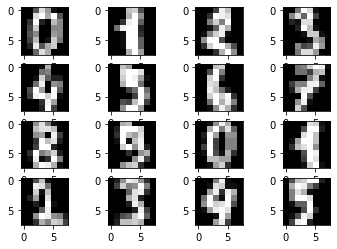

In [241]:
fig, ax=plt.subplots(nrows=4,ncols=4)
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(digits.data[i*4+j].reshape(8,8), cmap='gray')

과정 

x (64) , W(64, 10) = (w0(64),w1(64),w2(64)...w9(64)) , b(10)
w0의 역활은 : x가 숫자 0냐만 판별하고
x9의 역활은 : x가 숫자 9냐만 판별합니다
행렬곱셈(x, W) = (1, 64) . (64, 10) = (1, 10) + b(10)=(1, 10):10개의 스코어(가능성)
소프트맥스(스코어) = 확률(1, 10)
오차 : 크로스 엔트로피(확률(1, 10), 정답(Y의 원핫인코딩(1,10)))
판정(그래서 클래스가 뭐냐) : 가장큰 값의 위치(확률(10)) = 스칼라 0~9
정확도 : equal(Y, 판정결과)

In [ ]:
x = digits.data.astype(np.float32)
y = digits.target
x.shape, y.shape, x.dtype, y.dtype, np.min(x), np.max(x), np.min(y), np.max(y)

Linear Regression(WX+B) > Logistic Regression(sigmoid(WX+B)) : 노드 1개 완성
노드를 여러개 만들어서 1개의 레이어를 만듭니다
여러개의 레이어를 만듭니다(딥 뉴럴네트워크DNN, 콘볼루셔널 CNN, 재귀 RNN)

In [ ]:
y_onehot = tf.one_hot(y, depth=10)

In [ ]:
w = tf.Variable(tf.random_normal(shape=[64, 10]))
b = tf.Variable(tf.random_normal(shape=[10]))
xn = x / tf.reduce_max(x) # 최대값 15로 나누자 [0, 1]
z = tf.matmul(xn, w) + b #z 잠재변수, 여기서는 score/가능성
print('z', z)
h = tf.nn.softmax(z)
# y_onehot 이 1일때는 h도 1이 나와야 한다. 만약 0이면 h도 0이 나와야 한다
# log(1) = 0, log(0) = -inf 
h = tf.clip_by_value(h, 1e-8, 1 - 1e-8) # log(0) 이 되지 않도록 안전장치
cost = - tf.reduce_mean(y_onehot * tf.log(h) + (1-y_onehot) * tf.log(1-h))
#cost = - tf.reduce_mean(y_onehot * tf.log(h))
predict_class = tf.math.argmax(h, axis=1, output_type=tf.int32) #[0~9]
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict_class, y), tf.float32)) 
train = tf.train.GradientDescentOptimizer(0.5).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
for i in range(1000):
    _, c, a = sess.run([train, cost, accuracy])
    if i%100 == 0: print(i, c, a)

In [370]:
test_m = 10
np.set_printoptions(precision=1, suppress=True)
y[:test_m], sess.run(h)[:test_m]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
        [0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. ],
        [0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0. ],
        [0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. ],
        [0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. ],
        [0.5, 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0.4, 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ]], dtype=float32))